# Phase 1: DATA LOADING & CLEANING


## i. Structural Integrity

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'Data\employee_data.csv')
print(df.shape)
print(df.size)
print(df.head(5))

(20, 10)
200
  EmployeeID    Name  Age  Gender Department       City  ExperienceYears  \
0       E001  Anshul   21    Male        cse     Mumbai                1   
1       E002   Varun   25    Male       entc       Pune                3   
2       E003   Rohan   26    Male        cse  Bangalore                4   
3       E004   Karan   28    Male       mech       Pune                6   
4       E005   Tanya   24  Female         hr     Mumbai                2   

    Salary  PerformanceScore    JoinDate  
0  45000.0              88.0  2023-07-10  
1  55000.0              76.0  2021-06-15  
2  65000.0              91.0  2020-01-20  
3  72000.0              69.0  2018-03-11  
4      NaN              82.0  2022-08-01  


-csv file loaded without errors

-it has 20 rows and 10 cols

In [10]:
# Checking for duplicate columns:

df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False])

There are not duplicate columns

## ii. Data Types integrity

In [11]:
print(df.columns)

Index(['EmployeeID', 'Name', 'Age', 'Gender', 'Department', 'City',
       'ExperienceYears', 'Salary', 'PerformanceScore', 'JoinDate'],
      dtype='object')


In [12]:
print(df['EmployeeID'].dtype)


object


In [13]:
print(df['EmployeeID'].dtypes)

object


In [14]:
print(df['EmployeeID'])

0     E001
1     E002
2     E003
3     E004
4     E005
5     E006
6     E007
7     E008
8     E009
9     E010
10    E011
11    E012
12    E013
13    E014
14    E015
15    E016
16    E017
17    E018
18    E019
19    E020
Name: EmployeeID, dtype: object


In [15]:
# Now checking whether each column has all the values of same dtype

columns_list = df.columns
for col in columns_list:
    print(col,'     ',df[col].dtype)

EmployeeID       object
Name       object
Age       int64
Gender       object
Department       object
City       object
ExperienceYears       int64
Salary       float64
PerformanceScore       float64
JoinDate       object


here, JoinDate is of datatype object but it should be of datetime

In [16]:
print(f"Before: {df['JoinDate'].dtype}")
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
print(f"After: {df['JoinDate'].dtype}")
print(df['JoinDate'])

#hence the JoinDate col is converted to dtype datetime

Before: object
After: datetime64[ns]
0    2023-07-10
1    2021-06-15
2    2020-01-20
3    2018-03-11
4    2022-08-01
5    2016-05-19
6    2019-11-23
7    2014-02-17
8    2018-07-09
9    2023-01-05
10   2017-09-12
11   2012-04-28
12   2021-10-30
13   2009-06-14
14   2020-12-19
15   2015-08-07
16   2024-01-10
17   2016-11-03
18   2020-09-21
19   2013-05-26
Name: JoinDate, dtype: datetime64[ns]


## iii. Handling Missing Values

In [17]:
for col in df.columns:
    print(col,'     ',df[col].isna().sum())

EmployeeID       0
Name       0
Age       0
Gender       0
Department       0
City       0
ExperienceYears       0
Salary       2
PerformanceScore       2
JoinDate       0


Hence we can see that there are 2 null values in Salary and PerformanceScore

In [18]:
### Salary column:
# print(df['Salary'])
# Salary column has floating values so NaN values can be replaced with median Salary
# because this would be ok if the salary that is offered mediocurly may be given to the NaN employee

df["Salary"] = df["Salary"].fillna(df["Salary"].median())

print(df['Salary'])
print('No. of null values: ',df['Salary'].isna().sum())

#now there are no null values, all the null values of Salary column are filled with median Salary

0      45000.0
1      55000.0
2      65000.0
3      72000.0
4      71000.0
5      95000.0
6      70000.0
7      88000.0
8      82000.0
9      42000.0
10     78000.0
11    110000.0
12     60000.0
13    120000.0
14     68000.0
15     71000.0
16     38000.0
17     90000.0
18     66000.0
19     85000.0
Name: Salary, dtype: float64
No. of null values:  0


In [19]:
### PerformanceScore column:
print(df['PerformanceScore'])
# it will ok to replace the null values in this column with its mean considering the employee is average

df['PerformanceScore'] = df['PerformanceScore'].fillna(df['PerformanceScore'].mean())
df['PerformanceScore'] = df['PerformanceScore'].astype(int)
print(df['PerformanceScore'].dtype)


0     88.0
1     76.0
2     91.0
3     69.0
4     82.0
5      NaN
6     89.0
7     73.0
8     85.0
9     78.0
10    90.0
11    95.0
12    81.0
13    67.0
14    88.0
15    92.0
16    70.0
17    87.0
18     NaN
19    79.0
Name: PerformanceScore, dtype: float64
int64


Hence Salary and PerformanceScore column were having null values which are filled with some values now

## iv. Validity and Constraints

In [20]:
print(df.head(5))

  EmployeeID    Name  Age  Gender Department       City  ExperienceYears  \
0       E001  Anshul   21    Male        cse     Mumbai                1   
1       E002   Varun   25    Male       entc       Pune                3   
2       E003   Rohan   26    Male        cse  Bangalore                4   
3       E004   Karan   28    Male       mech       Pune                6   
4       E005   Tanya   24  Female         hr     Mumbai                2   

    Salary  PerformanceScore   JoinDate  
0  45000.0                88 2023-07-10  
1  55000.0                76 2021-06-15  
2  65000.0                91 2020-01-20  
3  72000.0                69 2018-03-11  
4  71000.0                82 2022-08-01  


In [21]:
#Age should be >= 18
print((df['Age'] >= 18).all())

#Gender should be Male or Female
print(df['Gender'].unique())

#Department should be: ['cse' 'entc' 'mech' 'hr' 'finance']
print(df['Department'].unique())

#ExperienceYears should be >=0 but < Age - 3
print(((df['ExperienceYears'] >= 0) & (df['ExperienceYears'] < df['Age'] - 3)).all())

#salary should be > 0 and < 400000
print(((df['Salary'] > 0) & (df['Salary'] < 400000)).all())

#Performance Score <=100
print((df['PerformanceScore'] <= 100).all())

#JoinDate should be between 2012-01-01 and 2025-12-22
print(((df['JoinDate'] >= "2012-01-01") & (df['JoinDate'] <= "2025-12-22")).all()) #its false so remove that particular record

df = df[(df['JoinDate'] >= "2012-01-01") & (df['JoinDate'] <= "2025-12-22")] #only rows in range are kept in new df

df = df.reset_index(drop = True)  # for resetting inedex no. after the index 13 was removed
print(df['JoinDate'])

True
['Male' 'Female']
['cse' 'entc' 'mech' 'hr' 'finance']
True
True
True
False
0    2023-07-10
1    2021-06-15
2    2020-01-20
3    2018-03-11
4    2022-08-01
5    2016-05-19
6    2019-11-23
7    2014-02-17
8    2018-07-09
9    2023-01-05
10   2017-09-12
11   2012-04-28
12   2021-10-30
13   2020-12-19
14   2015-08-07
15   2024-01-10
16   2016-11-03
17   2020-09-21
18   2013-05-26
Name: JoinDate, dtype: datetime64[ns]


## v. Consistency

In [22]:
# first lets rename all columns to lower so there are no case issues while comparision
df.columns = df.columns.str.lower()
print(df.columns)
print(df.head(5))

Index(['employeeid', 'name', 'age', 'gender', 'department', 'city',
       'experienceyears', 'salary', 'performancescore', 'joindate'],
      dtype='object')
  employeeid    name  age  gender department       city  experienceyears  \
0       E001  Anshul   21    Male        cse     Mumbai                1   
1       E002   Varun   25    Male       entc       Pune                3   
2       E003   Rohan   26    Male        cse  Bangalore                4   
3       E004   Karan   28    Male       mech       Pune                6   
4       E005   Tanya   24  Female         hr     Mumbai                2   

    salary  performancescore   joindate  
0  45000.0                88 2023-07-10  
1  55000.0                76 2021-06-15  
2  65000.0                91 2020-01-20  
3  72000.0                69 2018-03-11  
4  71000.0                82 2022-08-01  


## vi. Duplicates and Redundancy

In [23]:
# checking for duplicate employeeid
print(df['employeeid'].duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
Name: employeeid, dtype: bool


There are no duplicate records

In [24]:
# making new csv file cleaned version
df.to_csv(r'Data\employee_data_cleaned.csv',index=False)
df = pd.read_csv(r'Data\employee_data_cleaned.csv')

# Phase 2: Exploratory Data Analysis
In this phase, we analyze the cleaned employee dataset to extract meaningful insights that can help management make informed decisions related to compensation, performance, and workforce planning.


## i. Overall Salary and Performance Overview
This analysis provides a high-level understanding of the company’s compensation structure and employee performance levels.

In [25]:
average_salary = df['salary'].mean()
average_performance = df['performancescore'].mean()
min_salary = df['salary'].min()
max_salary = df['salary'].max()

average_salary, average_performance, min_salary, max_salary


(np.float64(71105.26315789473),
 np.float64(83.0),
 np.float64(38000.0),
 np.float64(110000.0))

Interpretation:

The average salary represents the typical compensation level across the organization, while the minimum and maximum salaries indicate the overall salary range.  
The average performance score shows the general performance level of employees.

These metrics help establish a baseline for further department-wise and city-wise comparisons.


## ii. Department-wise salary and performance analysis

This analysis examines how average salary and average performance scores vary across different departments in the organization.

In [26]:
#Average Salary ,average performnace score and no. of employees per department:
df.groupby(by = 'department').agg({
    'salary' : 'mean',
    'performancescore' : 'mean',
    'employeeid' : 'count'
})

,salary,performancescore,employeeid
department,,,
cse,71166.666667,89.500000,6
entc,45000.000000,74.666667,3
finance,81750.000000,83.750000,4
hr,75500.000000,84.750000,4
mech,80000.000000,71.000000,2


The department-wise analysis shows differences in both compensation and performance levels across teams.  
Some departments have higher average salaries, which may indicate higher skill requirements or strategic importance.  
Comparing average salary with average performance helps identify whether compensation levels are aligned with employee output.


## iii. Salary vs Performance Relationship

This analysis examines whether employees who receive higher salaries also tend to have higher performance scores.

In [27]:
df[['salary', 'performancescore']].corr()

,salary,performancescore
salary,1.000000,0.347258
performancescore,0.347258,1.000000


In [28]:
salary_perf_by_dept = df.groupby('department').agg(
    average_salary=('salary', 'mean'),
    average_performance=('performancescore', 'mean')
)

salary_perf_by_dept


,average_salary,average_performance
department,,
cse,71166.666667,89.500000
entc,45000.000000,74.666667
finance,81750.000000,83.750000
hr,75500.000000,84.750000
mech,80000.000000,71.000000


The overall relationship between salary and performance appears to be moderate rather than perfectly aligned.  
At the department level, some departments show relatively high salaries but only average performance scores, while others achieve strong performance with comparatively lower compensation.

This suggests that salary and performance are not always perfectly aligned, and further investigation may be required to ensure fair and performance-driven compensation practices.


## iv. Experience vs Salary Analysis

This analysis examines how employee salaries vary with years of experience to understand whether compensation increases appropriately with experience.


In [29]:
experience_salary = df.groupby('experienceyears')['salary'].mean().reset_index()
experience_salary

,experienceyears,salary
0,0,38000.000000
1,1,43500.000000
2,2,71000.000000
3,3,57500.000000
4,4,66333.333333
5,5,70000.000000
6,6,77000.000000
7,7,78000.000000
8,8,92500.000000
9,9,71000.000000


The analysis shows that average salary generally increases with years of experience, indicating a seniority-based compensation structure.  
However, the rate of increase may not be uniform across all experience levels, suggesting that factors beyond experience, such as role or performance, may also influence salary decisions.


From this pattern it can be seen that, the employees with particular expereince do not always earn more it may vary

## v. City-wise Salary Analysis

This analysis examines how average salaries differ across cities to understand the impact of geographic location on compensation.


In [30]:
city_salary = df.groupby('city').agg(
    average_salary=('salary', 'mean'),
    employee_count=('employeeid', 'count')
)

city_salary


,average_salary,employee_count
city,,
Bangalore,60600.000000,5
Mumbai,78666.666667,6
Pune,66400.000000,5
Tokyo,81333.333333,3


The city-wise analysis shows noticeable differences in average salary levels across locations.  
Cities with higher operational or living costs tend to offer higher average salaries.  
This information can help the organization design location-specific compensation policies.


## vi. High Performance Employees

This analysis identifies employees with high performance scores and examines whether their compensation levels are aligned with overall salary standards.


In [31]:
high_performers = df[df['performancescore'] >= 90]
high_performers[['employeeid', 'name', 'department', 'salary', 'performancescore']]

,employeeid,name,department,salary,performancescore
2,E003,Rohan,cse,65000.0,91
10,E011,Sneha,hr,78000.0,90
11,E012,Akash,cse,110000.0,95
14,E016,Saurabh,cse,71000.0,92


In [32]:
company_avg_salary = df['salary'].mean()

high_performers_with_comparison = high_performers.assign(
    above_company_avg_salary = high_performers['salary'] > company_avg_salary
)

high_performers_with_comparison[['employeeid', 'name', 'salary', 'above_company_avg_salary']]

,employeeid,name,salary,above_company_avg_salary
2,E003,Rohan,65000.0,False
10,E011,Sneha,78000.0,True
11,E012,Akash,110000.0,True
14,E016,Saurabh,71000.0,False


The analysis highlights employees with performance scores of 90 or above, representing top performers in the organization.  
While some of these employees earn salaries above the company average, others are compensated below average despite strong performance.  

This indicates potential retention risks, as underpaid high performers may seek opportunities elsewhere if compensation is not aligned with performance.


## vii. Salaries above department average

This analysis identifies employees whose salaries are higher than the average salary of their respective departments.

In [33]:
df['department_avg_salary'] = df.groupby('department')['salary'].transform('mean')

above_dept_avg = df[df['salary'] > df['department_avg_salary']]

above_dept_avg[['employeeid', 'name', 'department', 'salary', 'department_avg_salary']]


,employeeid,name,department,salary,department_avg_salary
1,E002,Varun,entc,55000.0,45000.000000
5,E006,Arya,finance,95000.0,81750.000000
7,E008,Rahul,mech,88000.0,80000.000000
8,E009,Priya,finance,82000.0,81750.000000
10,E011,Sneha,hr,78000.0,75500.000000
11,E012,Akash,cse,110000.0,71166.666667
16,E018,Kavya,finance,90000.0,81750.000000
18,E020,Ishita,hr,85000.0,75500.000000


The analysis identifies employees whose salaries exceed the average compensation level within their respective departments.  
Such cases may indicate senior roles, specialized skills, or exceptional contributions, but they may also require periodic review to ensure internal pay equity.

This insight helps management maintain fair and transparent compensation structures across teams.


# Phase 3: Key Insights and Recommendations

This phase summarizes the key findings from the analysis and provides recommendations that can help the organization improve expenditure fairness, performance alignment, and workforce distribution planning.

### Insight 1: Salary Distribution

The organization shows a wide salary range, indicating the presence of both junior and senior employees. While this is expected, it also highlights the importance of having clear compensation bands to ensure consistency and transparency.

Recommendation:

It is recommended that the organization maintains clearly defined salary bands for different roles and experience levels to support fair and structured compensation decisions.

### Insight 2: Department-wise Salary and Performance

Some departments have higher average salaries, while others demonstrate strong performance with relatively lower compensation. This suggests that salary levels and performance outcomes are not always perfectly aligned across departments.

Recommendation:  
The organization may benefit from periodic department-level reviews to ensure that compensation structures are aligned with actual performance and contribution.


### Insight 3: High Performers and Compensation

The analysis identified several high-performing employees who are compensated below the company’s average salary. This could pose a potential retention risk if such employees feel undervalued.

Recommendation:  
It is recommended that management closely monitor high-performing employees and consider performance-based incentives or growth opportunities to support retention.

### Insight 4: Experience and Salary Growth

Salary generally increases with years of experience, indicating a seniority-based compensation structure. However, the rate of salary growth varies across experience levels.

Recommendation:  
The organization may consider refining its experience-based compensation policies to ensure consistent and predictable salary progression for employees.

### Insight 5: City-wise Salary Differences

Salary levels vary across cities, likely reflecting differences in cost of living and operational expenses. This highlights the importance of location-aware compensation strategies.

Recommendations:  
The organization should continue to account for geographic cost differences when designing compensation policies, especially for international locations.

# Visualizations 

### Salary Distribution

Histogram

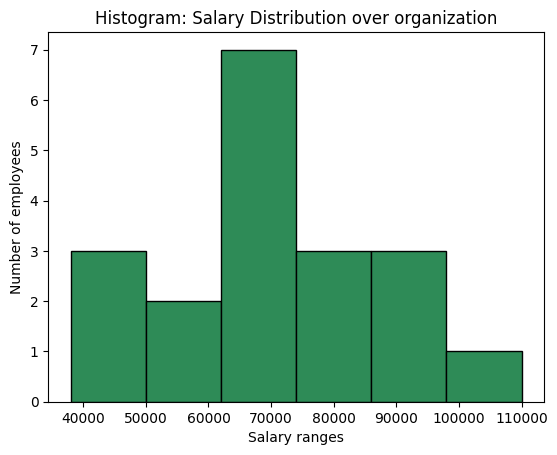

In [34]:

plt.hist(df['salary'].values, bins = 6,edgecolor = 'black', color = 'seagreen')
plt.xlabel('Salary ranges')
plt.ylabel('Number of employees')
plt.title('Histogram: Salary Distribution over organization')
plt.savefig('images/Salary distribution org histogram.png')
plt.show()

Observation: It can be observed that the most employees have salaries between 60000 to 700.

Box Plot

<Axes: ylabel='salary'>

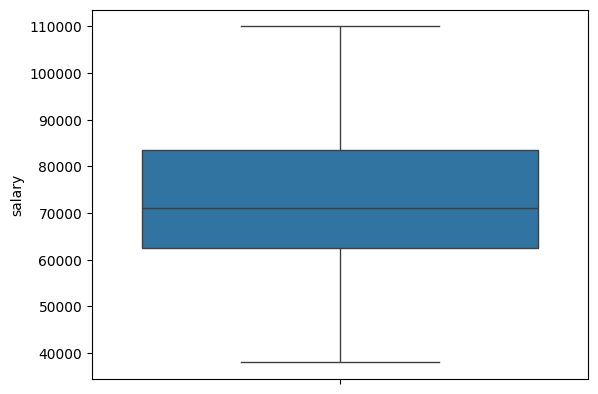

In [35]:
sns.boxplot(y = 'salary', data = df)

Observation: It can be seen that 50% salary is below 70000, 25% percent of the employees have salaries less than ~62000, 75% of the employees have salaries less than ~83000.

### Age Vs Sallary : Scatter Plot

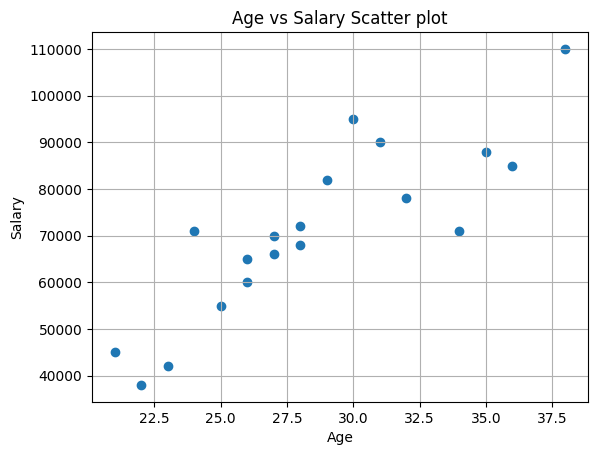

In [36]:

plt.scatter(df['age'], df['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary Scatter plot')
plt.grid()
plt.savefig("images/Age vs Salary Scatter Plot")
plt.show()

Observation: It can be seen that as the employee experience increases, the salary increases

### Performance Score Distribution : Histogram

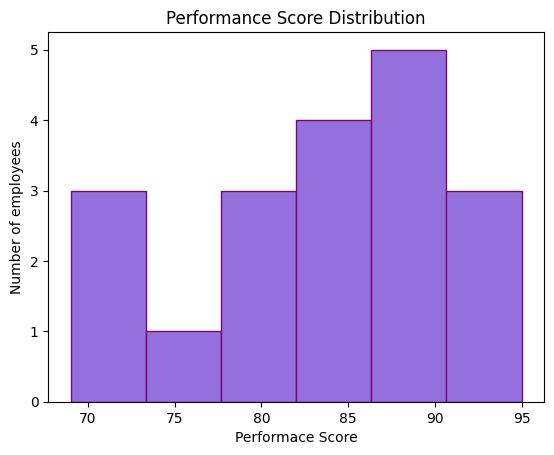

In [37]:
plt.hist(df['performancescore'].values, bins = 6,color = 'mediumpurple', edgecolor = 'purple')
plt.xlabel('Performace Score')
plt.ylabel("Number of employees")
plt.title("Performance Score Distribution")
plt.savefig("images/Performance Distribution Histogram")

Observation: Most no. of employees scored between 86 to 91

### Corelation Heatmap : Age, Salary, Performance score

  employeeid    name  age  gender department       city  experienceyears  \
0       E001  Anshul   21    Male        cse     Mumbai                1   
1       E002   Varun   25    Male       entc       Pune                3   
2       E003   Rohan   26    Male        cse  Bangalore                4   
3       E004   Karan   28    Male       mech       Pune                6   
4       E005   Tanya   24  Female         hr     Mumbai                2   

    salary  performancescore    joindate  department_avg_salary  
0  45000.0                88  2023-07-10           71166.666667  
1  55000.0                76  2021-06-15           45000.000000  
2  65000.0                91  2020-01-20           71166.666667  
3  72000.0                69  2018-03-11           80000.000000  
4  71000.0                82  2022-08-01           75500.000000  


<Axes: >

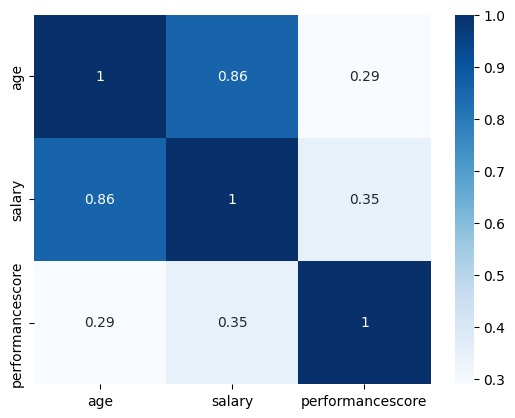

In [38]:
print(df.head(5))
heatmap_df = df[['age','salary','performancescore']]

heatmap_df = heatmap_df.corr()

sns.heatmap(heatmap_df, annot = True, cmap = 'Blues')

Observation:  
Age and salary have strong relationship which means, as the age of the employee increases its salary also increases while age and performance, salary and performance score are weakly connected
